# 「Python による経済・経営分析のための実践的データサイエンス」第6章 (pp.184-193)

## 6.2 決定木分析

まずは, 今回利用するデータを取り込みます.実データを確認しやすくするため, excel データ (xlsx) にしています.
データは以下のgithubからダウンロードしてください。
https://github.com/yoshihikom/thu_Details_of_Management_Information_BII_Lesson4/blob/main/FIFA19_data.xlsx

In [1]:
import pandas as pd
input_book = pd.ExcelFile('FIFA19_data.xlsx')

input_sheet_name = input_book.sheet_names
num_sheet = len(input_sheet_name)
print(input_sheet_name)
print("Sheet の数:", num_sheet)
input_sheet_df = input_book.parse(input_sheet_name[0])

#GK のデータのみを外す
input_sheet_df = input_sheet_df[input_sheet_df['Position'] != "GK"]
#この箇所をコメントアウトすると、ゴールキーパーを含んだ形での分析になります

#最初の10行のみを表示する
input_sheet_df.head(10)

['data', 'Sheet1']
Sheet の数: 2


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,fifarank,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,11,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,7,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,3,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,1,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,1,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,5,Real Madrid,...,84,60,76,73,13,9,7,14,9,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,6,FC Barcelona,...,85,62,45,38,27,25,31,33,37,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,9,Real Madrid,...,82,87,92,91,11,8,9,7,11,€104.6M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,20,FC Bayern München,...,86,34,42,19,15,6,12,8,10,€127.1M
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,13,Real Madrid,...,85,72,79,69,10,11,13,7,10,€156.8M


In [3]:
import numpy as np

#データを読み込む
age=input_sheet_df.Age #年齢
overall=input_sheet_df.Overall #総合能力
wage=input_sheet_df.Wage2 #給与
preferredfoot=input_sheet_df.preferredfoot #利き足
reputation=input_sheet_df.reputation #レピュテーション
least_contract=input_sheet_df.least_contract #残りの契約年数
height=input_sheet_df.height2 #身長
weight=input_sheet_df.weight2 #体重
crossing=input_sheet_df.Crossing #クロス精度
finishing=input_sheet_df.Finishing #フィニッシュ精度
heading=input_sheet_df.HeadingAccuracy #ヘディング精度
shortPassing=input_sheet_df.ShortPassing #ショートパス精度
dribbling=input_sheet_df.Dribbling #ドリブルの精度
Curve=input_sheet_df.Curve #カーブの精度
FKAccuracy=input_sheet_df.FKAccuracy #FK の精度
LongPassing=input_sheet_df.LongPassing #ロングパスの精度
BallControl=input_sheet_df.BallControl #ボールコントロール
Acceleration=input_sheet_df.Acceleration #飛び出し
SprintSpeed=input_sheet_df.SprintSpeed #スプリントスピード
Agility=input_sheet_df.Agility #アジリティ
Reactions=input_sheet_df.Reactions #リアクション
Balance=input_sheet_df.Balance #バランス
ShotPower=input_sheet_df.ShotPower #シュートパワー
stamina=input_sheet_df.Stamina #スタミナ
Jumping=input_sheet_df.Jumping #ジャンプ
Strength=input_sheet_df.Strength #ストレングス
LongShots=input_sheet_df.LongShots #ロングスート
Aggression=input_sheet_df.Aggression #アグレッション
Interceptions=input_sheet_df.Interceptions #インターセプト
Positioning=input_sheet_df.Positioning #ポジショニング
Vision=input_sheet_df.Vision #ビジョン
Penalties=input_sheet_df.Penalties #ペナルティキック
Composure=input_sheet_df.Composure #コンポジュア
Marking=input_sheet_df.Marking #マーキング
StandingTackle=input_sheet_df.StandingTackle #スタンディングタックル
SlidingTackle=input_sheet_df.SlidingTackle #スライディングタックル

#利用するパラメータを指定する
#overall はここから除外しています。結果が変わるので、入れたバージョンも実施してみてください
equation_df2=pd.concat([wage, age, preferredfoot, reputation, least_contract, height, weight, \
crossing, finishing, heading, shortPassing, dribbling, Curve, FKAccuracy, \
LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, \
Balance, ShotPower, stamina, Jumping, Strength, LongShots, Aggression, \
Interceptions, Positioning, Vision, Penalties, Composure, Marking, \
StandingTackle, SlidingTackle], axis=1)

#被説明変数として利用するものを取り出す
wage2 = pd.DataFrame(equation_df2.Wage2)
#被説明変数を抜き取る
x_list2 = equation_df2.drop("Wage2",axis=1)

#異常値やnull になっている値を除去する
x_list2 = x_list2.drop(x_list2.columns[np.isnan(x_list2).any()], axis=1)

<Axes: >

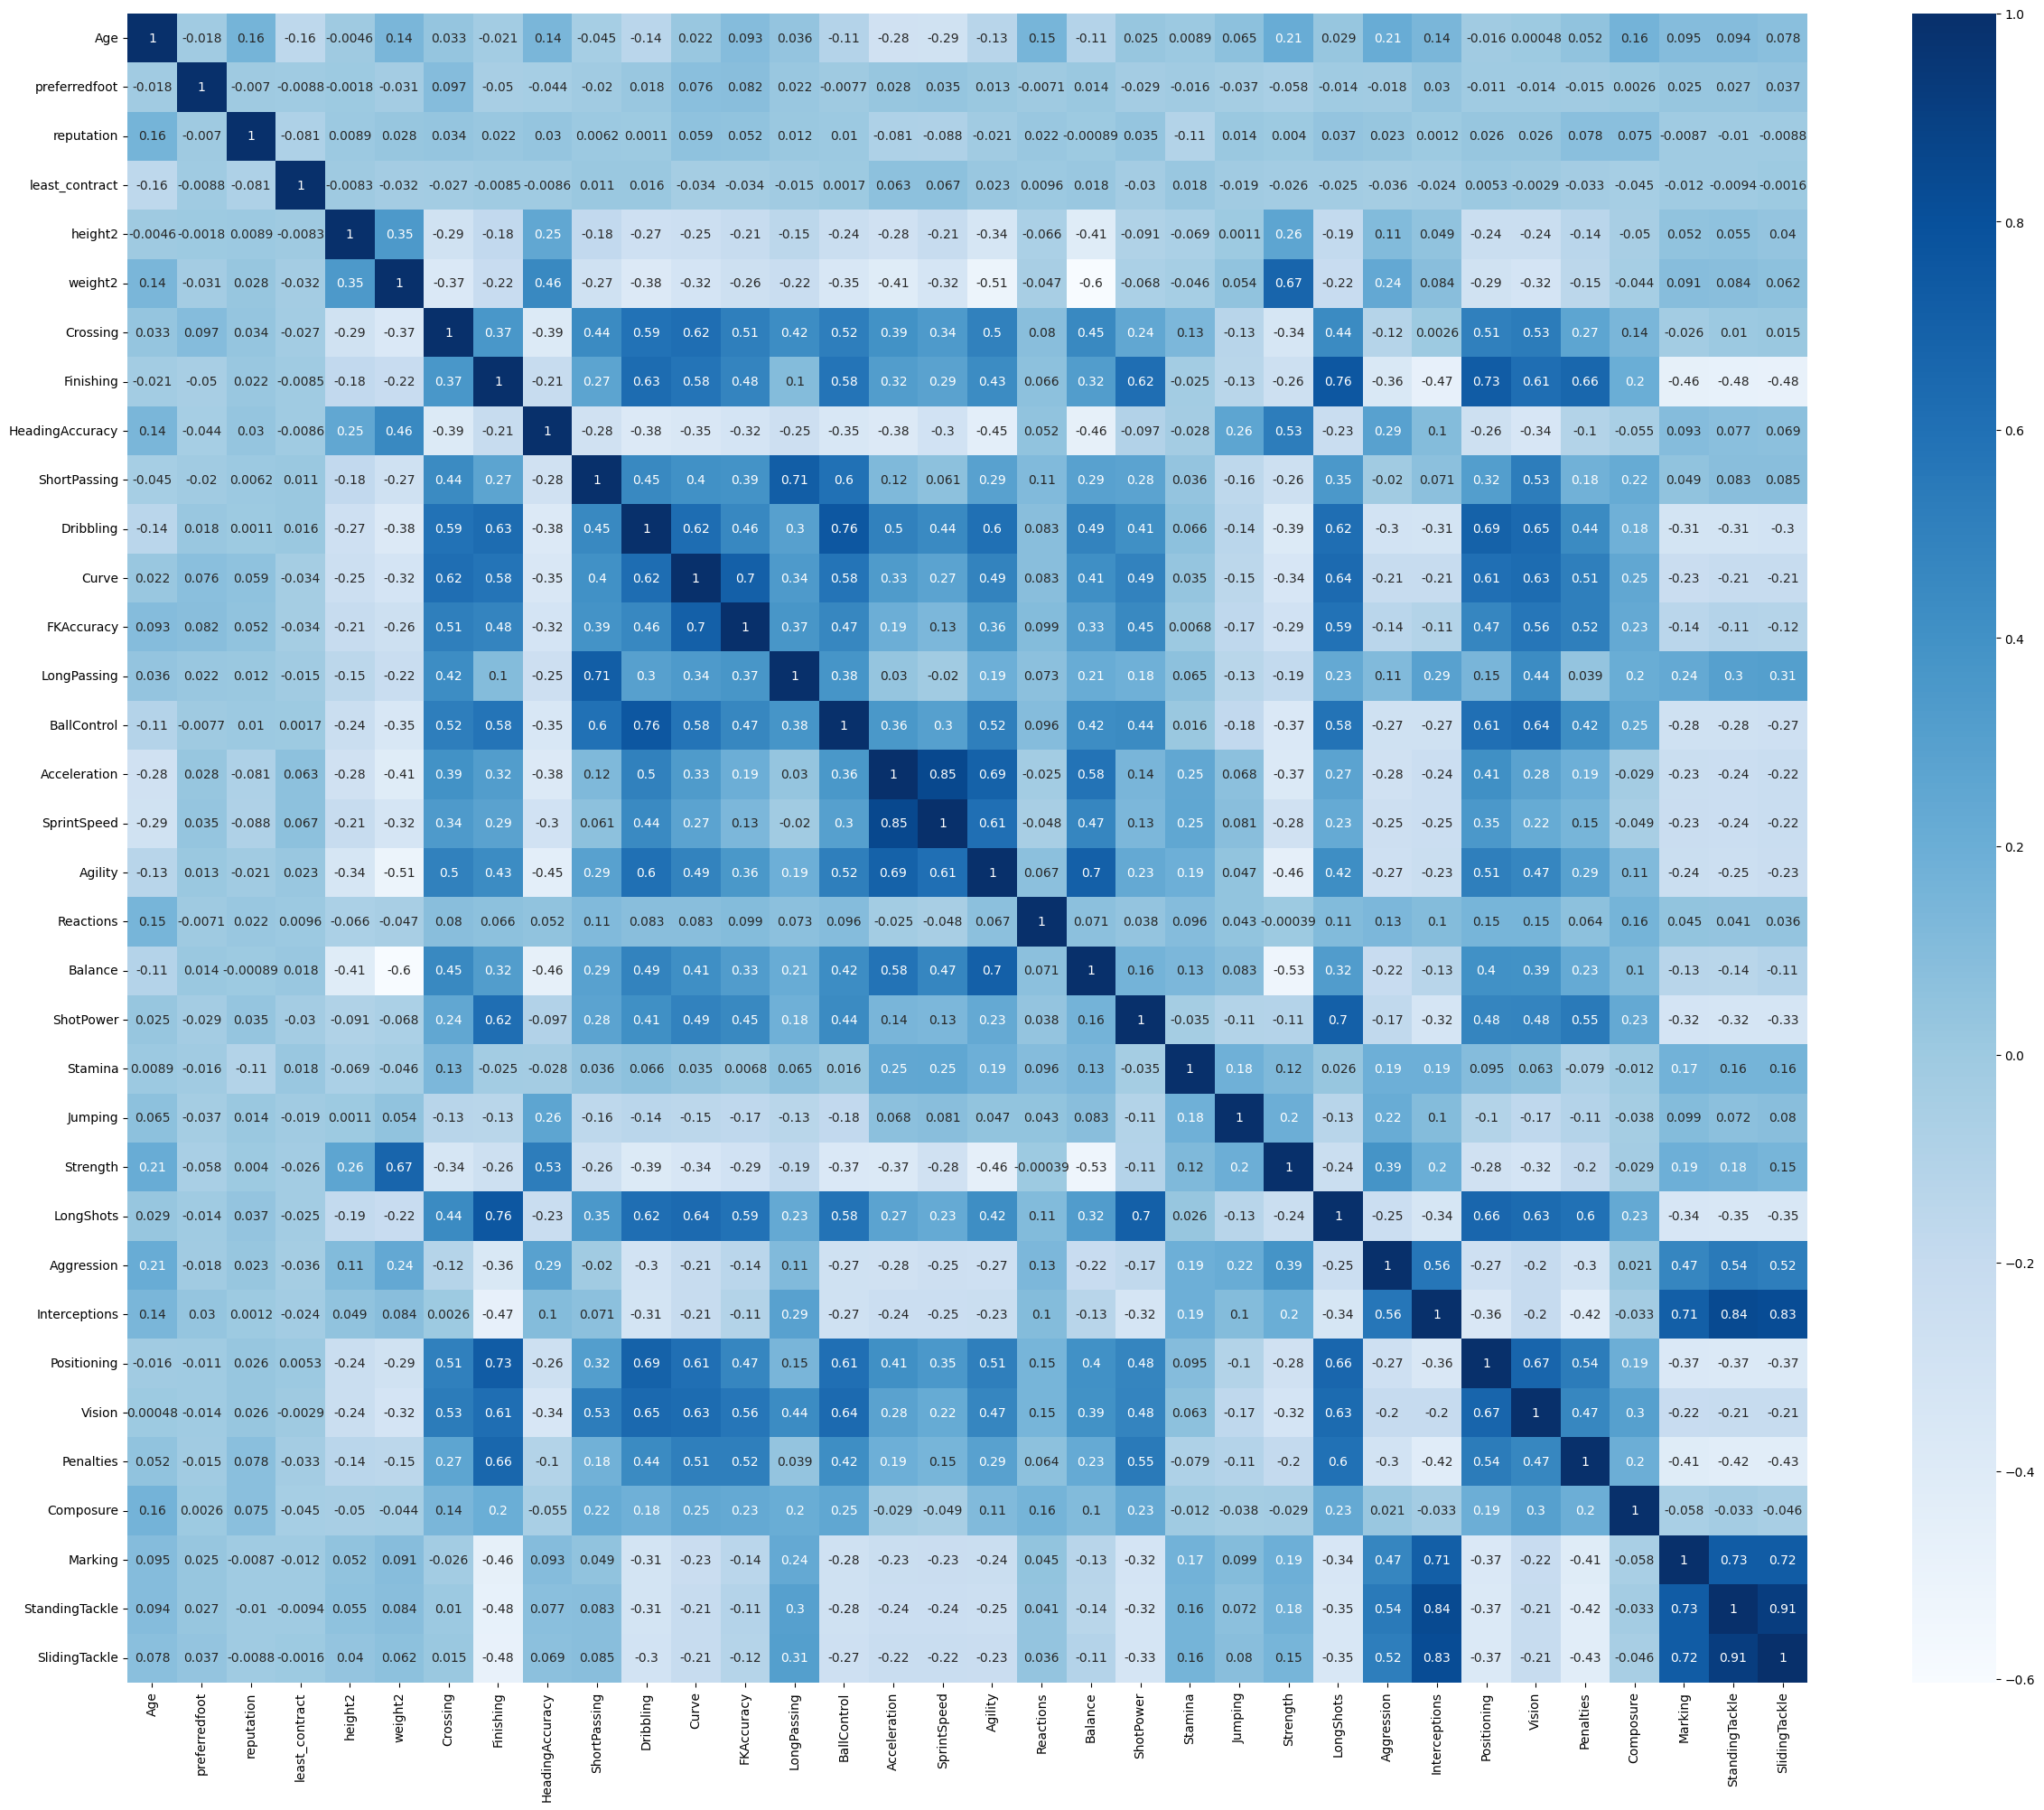

In [4]:
from sklearn import preprocessing, linear_model
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#データの整形を行う
#データの標準化を行う
sc=preprocessing.StandardScaler()
sc.fit(x_list2)

X=sc.transform(x_list2)

sc2=preprocessing.StandardScaler()
sc2.fit(wage2)

Y=sc2.transform(wage2)

#相関係数を確認する
plt.figure(figsize=(30, 24))
sns.heatmap(x_list2.pct_change().corr(), annot=True, cmap='Blues')

sklearn の model_selection を用いて、データの分割を行います

In [5]:
from sklearn import model_selection

#学習データとテストデータに分割する
#分割する割合は2:8 で作業する

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, wage2, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier

#決定木分析を, X_train 値と Y_train 値に基づき行う
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model3.fit(X_train, Y_train)

print('正解率 (train):{:.3f}'.format(model3.score(X_train, Y_train)))
print('正解率 (test):{:.3f}'.format(model3.score(X_test, Y_test)))

正解率 (train):0.262
正解率 (test):0.266


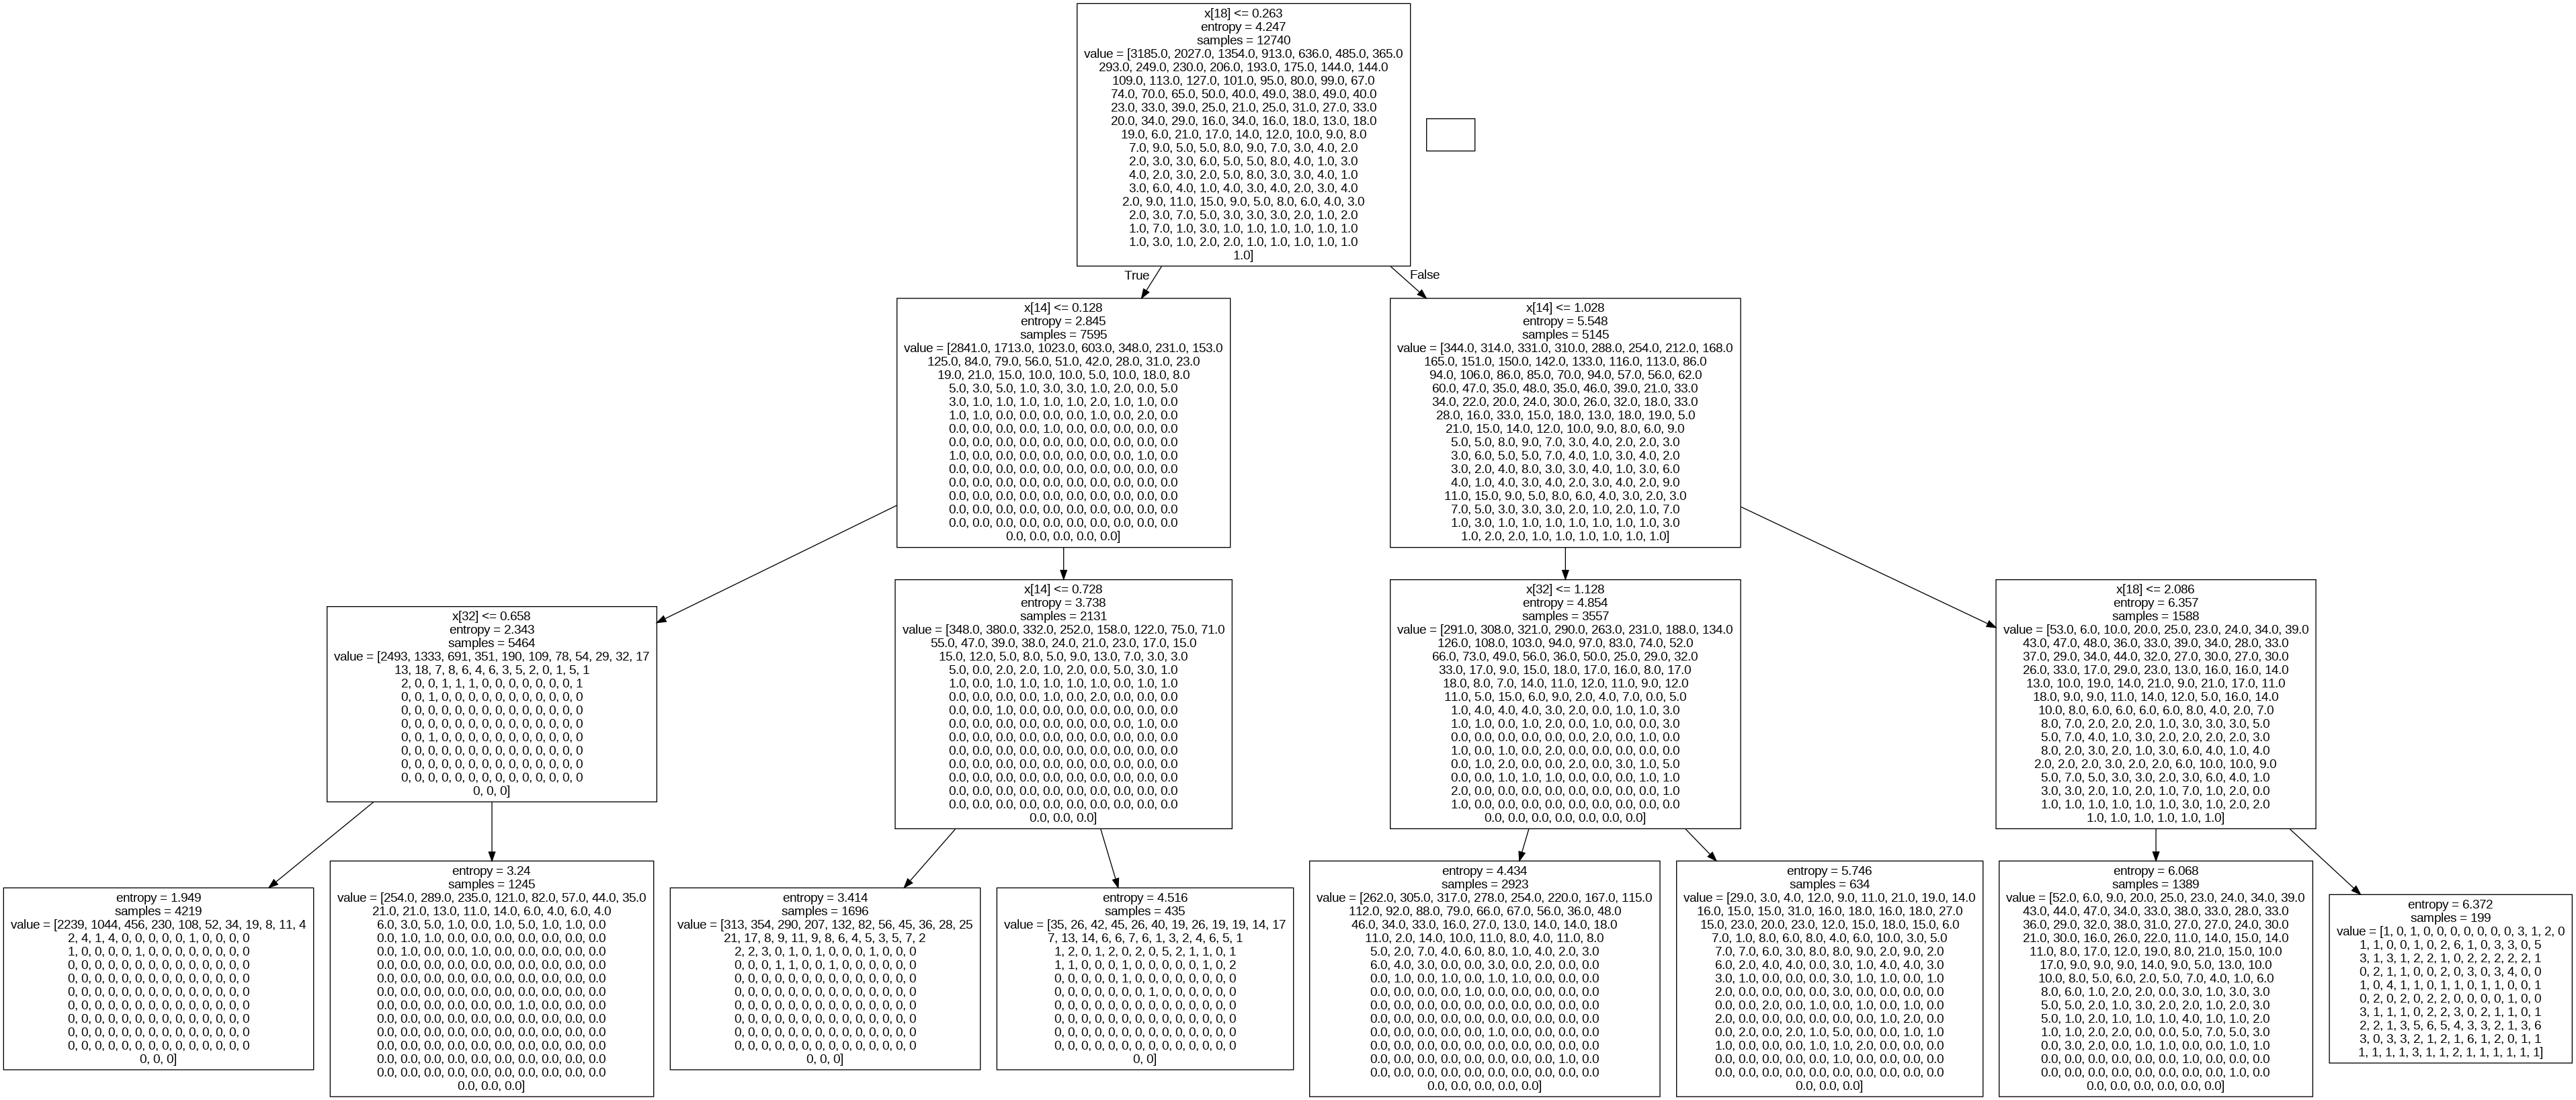

In [7]:
#決定木の表示
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data=StringIO()
tree.export_graphviz(model3, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

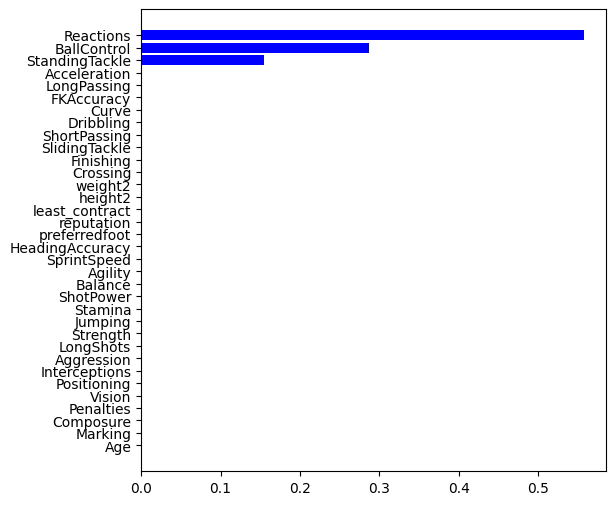

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

features = x_list2.columns
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

## 6.3 SVM

In [9]:
from sklearn.svm import LinearSVR

#LinearSVR モデルを用いる
clf2 = LinearSVR(random_state=0)
clf2.fit(X_train, Y_train)

print("SVMでの係数")
print(clf2.intercept_)
print(clf2.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVMでの係数
[7.2447215]
[-6.72625170e-01  2.92652136e-02  8.78527800e+00  2.65724863e-01
  1.04951772e-01  1.15914087e-01  2.11992681e-01  4.42592770e-01
  8.21010550e-01  3.38734638e-01  1.18727693e-01  1.98310679e-01
  1.06883081e-02 -2.33244913e-01  5.09286819e-01  2.07743318e-01
  9.40283277e-02  1.47319722e-02  1.25108161e+00 -1.21164728e-01
  1.39245865e-01 -6.37918361e-02 -2.65529135e-03 -9.72060405e-02
 -2.44283795e-01  9.94024337e-02  3.63528447e-03 -1.79652211e-01
 -9.55121670e-02  2.11146817e-01  6.47842500e-01  8.35920810e-02
  3.18251578e-01  9.35980844e-02]


### 係数がどれに対応するかわかり易くするためのリスト（4列の場合）

age, preferredfoot, reputation, least_contract,

height, weight, crossing, finishing,

heading, shortPassing, dribbling, Curve,

FKAccuracy, LongPassing, BallControl, Acceleration,

SprintSpeed, Agility, Reactions, Balance,

ShotPower, stamina, Jumping, Strength,

LongShots, Aggression, Interceptions, Positioning,

Vision, Penalties, Composure, Marking,

StandingTackle, SlidingTackle

## 6.4 SGDRegressor

In [10]:
#SGD Regressor を適用する
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)

print("SGD Regressor での係数")
print(clf.intercept_)
print(clf.coef_)

SGD Regressor での係数
[10.06605774]
[-2.95890191e+00  2.78554433e-01  1.14008905e+01  3.37376514e-01
  2.06967640e-01  7.40228774e-01  8.60508155e-02  1.35173884e+00
  1.18557317e+00  7.55776627e-01 -2.77722810e-01 -2.13199741e-01
 -1.14687733e-01 -6.92148775e-01  1.45246445e+00  8.04949011e-01
  3.13698176e-01 -3.16208210e-01  3.48067436e+00  4.71554796e-01
 -3.13259351e-01  3.01648845e-01 -1.71604406e-01  1.45728271e-01
 -6.45755301e-01 -4.48638655e-01 -4.26995570e-01 -7.74460324e-01
  6.55621913e-05 -2.17051871e-01  1.21242099e+00  3.32719327e-01
  2.32660728e-01  5.45473972e-01]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 6.5 スパース推定(Lasso)

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train, Y_train)

print("\nLasso alpha=0.01 での係数")
print(lasso.intercept_)
print(lasso.coef_)

print(f"training datに対しての精度：{lasso.score(X_train, Y_train)}")
print(f"test set scoreに対しての精度：{lasso.score(X_test, Y_test)}")
print(f"使われている特徴量の数：{np.sum(lasso.coef_ != 0)}")

lasso2 = Lasso(alpha=0.1).fit(X_train, Y_train)

print("\nLasso alpha=0.1 での係数")
print(lasso2.intercept_)
print(lasso2.coef_)

print(f"training datに対しての精度：{lasso2.score(X_train, Y_train)}")
print(f"test set scoreに対しての精度：{lasso2.score(X_test, Y_test)}")
print(f"使われている特徴量の数：{np.sum(lasso2.coef_ != 0)}")

lasso3 = Lasso(alpha=1).fit(X_train, Y_train)

print("\nLasso alpha=1 での係数")
print(lasso3.intercept_)
print(lasso3.coef_)

print(f"training datに対しての精度：{lasso3.score(X_train, Y_train)}")
print(f"test set scoreに対しての精度：{lasso3.score(X_test, Y_test)}")
print(f"使われている特徴量の数：{np.sum(lasso3.coef_ != 0)}")


Lasso alpha=0.01 での係数
[10.22795747]
[-3.12492566  0.11054247 12.22801047  0.66637837  0.35494046  0.65252018
  0.0450172   1.31255697  1.34554317  0.80197074 -0.03468427 -0.02363567
  0.         -0.47795684  1.54630158  0.80099367  0.38879772 -0.08181274
  3.89036723  0.51258698 -0.26903504  0.37190946 -0.07533209  0.19350922
 -0.44133405 -0.31080296 -0.25024898 -0.55918816  0.         -0.
  1.38186899  0.48095718  0.31695362  0.63590156]
training datに対しての精度：0.5299082687009045
test set scoreに対しての精度：0.5400550361012757
使われている特徴量の数：31

Lasso alpha=0.1 での係数
[10.22322742]
[-3.04079598e+00  8.47380279e-03  1.21844006e+01  6.63658330e-01
  2.70437557e-01  4.88280583e-01  0.00000000e+00  3.34789545e-01
  1.28763801e+00  3.60133925e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.40136008e+00  6.85685938e-01
  4.27583352e-01  0.00000000e+00  3.85936369e+00  1.27820823e-01
 -2.72050103e-02  2.84781269e-01  0.00000000e+00  0.00000000e+00
 -8.74309101e-02 -5.16131964e-03  0

### 係数がどれに対応するかわかり易くするためのリスト（6列の場合）

age, preferredfoot, reputation, least_contract, height, weight,

crossing, finishing, heading, shortPassing, dribbling, Curve,

FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility,

Reactions, Balance, ShotPower, stamina, Jumping, Strength,

LongShots, Aggression, Interceptions, Positioning, Vision, Penalties,

Composure, Marking, StandingTackle, SlidingTackle

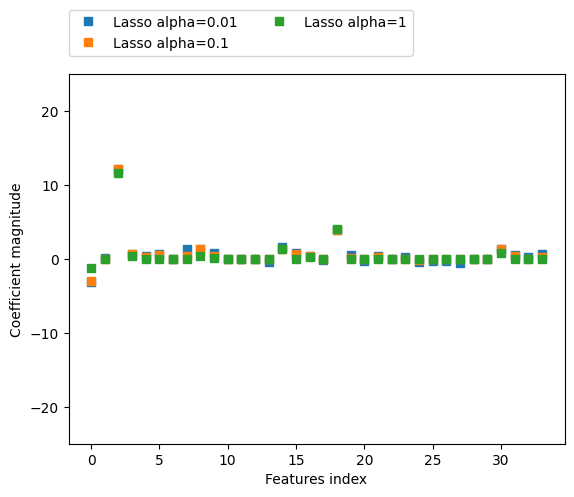

In [12]:
import matplotlib.pyplot as plt

plt.plot(lasso.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso2.coef_, 's', label="Lasso alpha=0.1")
plt.plot(lasso3.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Features index")
plt.ylabel("Coefficient magnitude")

plt.show()

## 6.6 リッジ推定(Ridge)

In [13]:
#Ridge 推定を行う
from sklearn.linear_model import Ridge

clf3 = Ridge(random_state=0)
clf3.fit(X_train, Y_train)

print("Ridge での係数")
print(clf3.intercept_)
print(clf3.coef_)

Ridge での係数
[10.22845713]
[[-3.13685292  0.12042355 12.23202355  0.66499638  0.36414791  0.66414393
   0.09684856  1.41998771  1.36215767  0.84631083 -0.14631173 -0.07125294
   0.04835798 -0.56190922  1.61574664  0.83660542  0.39100016 -0.12914937
   3.90489913  0.57244594 -0.30089545  0.38613271 -0.09568427  0.22367409
  -0.47829375 -0.33282207 -0.40734454 -0.62967628  0.07027767 -0.0235057
   1.38988552  0.50651945  0.39929707  0.69710975]]


### 係数がどれに対応するかわかり易くするためのリスト（6列の場合）
age, preferredfoot, reputation, least_contract, height, weight,

crossing, finishing, heading, shortPassing, dribbling, Curve,

FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility,

Reactions, Balance, ShotPower, stamina, Jumping, Strength,

LongShots, Aggression, Interceptions, Positioning, Vision, Penalties,

Composure, Marking, StandingTackle, SlidingTackle

## 6.7 モデルの比較

In [14]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
#モデルの比較
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(random_state=0),
    'Lasso(alpha=0.01)': linear_model.Lasso(alpha=0.01),
    'Lasso(alpha=0.1)': linear_model.Lasso(alpha=0.1),
    'Lasso(alpha=1)': linear_model.Lasso(alpha=1)
}


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

#評価値の計算
scores = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(Y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(Y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(Y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(Y_test, model.predict(X_test))

#表示
pd.Series(scores).unstack()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MAE,MSE,MedAE,R2
DecisionTreeRegressor,7.034840,330.101381,2.000000,0.379475
Lasso(alpha=0.01),7.560308,244.677329,4.105589,0.540055
Lasso(alpha=0.1),7.478694,245.739708,4.003064,0.538058
Lasso(alpha=1),7.192486,254.578082,3.592143,0.521444
LinearRegression,7.574340,244.599643,4.118228,0.540201
LinearSVR,6.511312,301.553796,2.211256,0.433139
Ridge,7.574147,244.600463,4.115747,0.540200
